In [1]:
#Importar as bibliotecas necessárias
import numpy as np   
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
dbs = ['SK-1M-2d',
        'SK-1M-20d',
        'SK-1M-32d',
        'SIFT1M',
        'SK-1M-12d',
        'SK-5M-12d',
        'SK-10M-12d',
        'SK-13M-12d',
      ]

In [3]:
df = pd.read_csv('raw_data_gpu.csv')

In [17]:
df[df['Method'] == 'ivfsq']

Name Method    Dim    N_sample    Time kNN            Recall@10
3     SK-1M-2d  ivfsq    2.0   1000000.0    6.659110  0.23488955333333333
7    SK-1M-20d  ivfsq   20.0   1000000.0    7.601050   0.7075854633333335
11   SK-1M-32d  ivfsq   32.0   1000000.0    8.282998   0.5265332933333333
15      SIFT1M  ivfsq  128.0   1000000.0   21.334738   0.7935883066666664
19   SK-1M-12d  ivfsq   12.0   1000000.0    7.127158   0.7839072966666666
23   SK-5M-12d  ivfsq   12.0   5000000.0   60.974567   0.7324573853333333
27  SK-10M-12d  ivfsq   12.0  10000000.0  341.480463   0.7274751699999998
31  SK-13M-12d  ivfsq   12.0  13000000.0  382.282563   0.7357207056410255

In [15]:
df['Method'] == 'brute'

0     True
1    False
2    False
3    False
Name: Method, dtype: bool

In [5]:
n = 1e6

In [6]:
df_dim = df.sort_values(by=['Dim'],ascending=True)

In [7]:
lista = { 'brute': df_dim['Method'] == 'brute',
          'ivfflat':df_dim['Method'] == 'ivfflat',
          'ivfpq':df_dim['Method'] == 'ivfpq',
          'ivfsq':df_dim['Method'] == 'ivfsq',
        }

Text(0.5, 0, 'Dimensions')

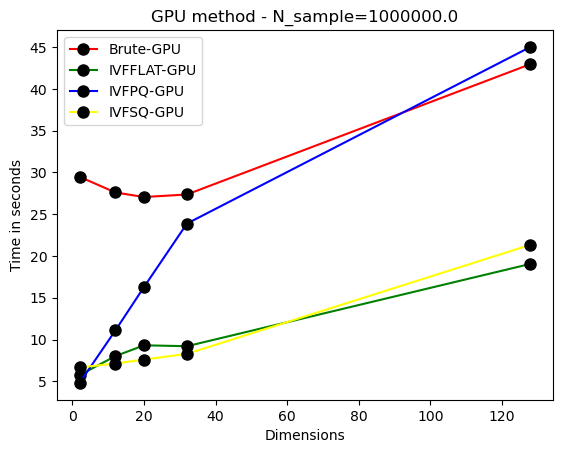

In [8]:
plt.plot(df_dim[ (lista['brute']) & (df_dim['N_sample'] == n)]['Dim'].to_numpy(),df_dim[ (lista['brute']) & (df_dim['N_sample'] == n)]['Time kNN'],
        label='Brute-GPU',marker='o',markersize=8,color='red',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
)
plt.plot(df_dim[ (lista['ivfflat']) & (df_dim['N_sample'] == n)]['Dim'].to_numpy(),df_dim[ (lista['ivfflat']) & (df_dim['N_sample'] == n)]['Time kNN'],
        label='IVFFLAT-GPU',marker='o',markersize=8,color='green',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
)
plt.plot(df_dim[ (lista['ivfpq']) & (df_dim['N_sample'] == n)]['Dim'].to_numpy(),df_dim[ (lista['ivfpq']) & (df_dim['N_sample'] == n)]['Time kNN'],
        label='IVFPQ-GPU',marker='o',markersize=8,color='blue',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
)
plt.plot(df_dim[ (lista['ivfsq']) & (df_dim['N_sample'] == n)]['Dim'].to_numpy(),df_dim[ (lista['ivfsq']) & (df_dim['N_sample'] == n)]['Time kNN'],
        label='IVFSQ-GPU',marker='o',markersize=8,color='yellow',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
)
plt.legend()
plt.title(f'GPU method - N_sample={n}')
plt.ylabel('Time in seconds')
plt.xlabel('Dimensions')

In [9]:
df_n = df.sort_values(by=['N_sample'],ascending=True)

In [10]:
n = 12

In [11]:
lista = { 'brute': df_n['Method'] == 'brute',
          'ivfflat':df_n['Method'] == 'ivfflat',
          'ivfpq':df_n['Method'] == 'ivfpq',
          'ivfsq':df_n['Method'] == 'ivfsq',
        }

Text(0.5, 0, 'N_samples')

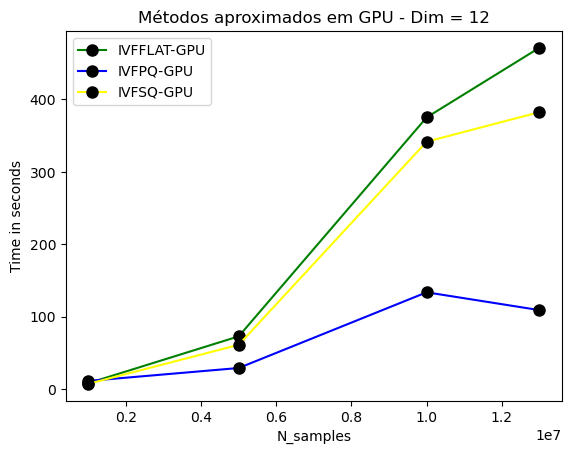

In [12]:

plt.plot(df_n[ (lista['ivfflat']) & (df_n['Dim'] == n)]['N_sample'].to_numpy(),df_n[ (lista['ivfflat']) & (df_n['Dim'] == n)]['Time kNN'],
        label='IVFFLAT-GPU',marker='o',markersize=8,color='green',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
)
plt.plot(df_n[ (lista['ivfpq']) & (df_n['Dim'] == n)]['N_sample'].to_numpy(),df_n[ (lista['ivfpq']) & (df_n['Dim'] == n)]['Time kNN'],
        label='IVFPQ-GPU',marker='o',markersize=8,color='blue',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
)
plt.plot(df_n[ (lista['ivfsq']) & (df_n['Dim'] == n)]['N_sample'].to_numpy(),df_n[ (lista['ivfsq']) & (df_n['Dim'] == n)]['Time kNN'],
        label='IVFSQ-GPU',marker='o',markersize=8,color='yellow',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
)
plt.legend()
plt.title(f'Métodos aproximados em GPU - Dim = {n}')
plt.ylabel('Time in seconds')
plt.xlabel('N_samples')

Text(0.5, 0, 'N_samples')

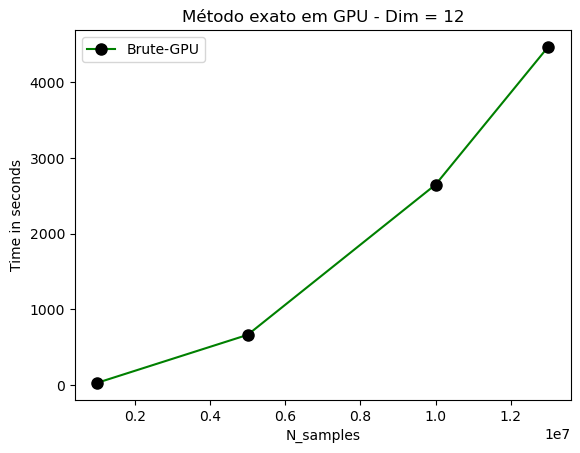

In [13]:

plt.plot(df_n[ (lista['brute']) & (df_n['Dim'] == n)]['N_sample'].to_numpy(),df_n[ (lista['brute']) & (df_n['Dim'] == n)]['Time kNN'],
        label='Brute-GPU',marker='o',markersize=8,color='green',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
)

plt.legend()
plt.title(f'Método exato em GPU - Dim = {n}')
plt.ylabel('Time in seconds')
plt.xlabel('N_samples')